**Praktikum 2**

Konsep K-Means untuk klasterisasi data

**import library**

In [25]:
import matplotlib.pyplot as plt # Library yang digunakan untuk membuat grafik dan visualisasi data di Python
import seaborn as sns; sns.set() #  library untuk mengatur gaya visualisasi. Dengan sns.set(), mengatur gaya dasar Seaborn untuk plot
import numpy as np # Library untuk komputasi numerik, termasuk array multidimensional dan berbagai fungsi matematika

**Pengantar k-Means**

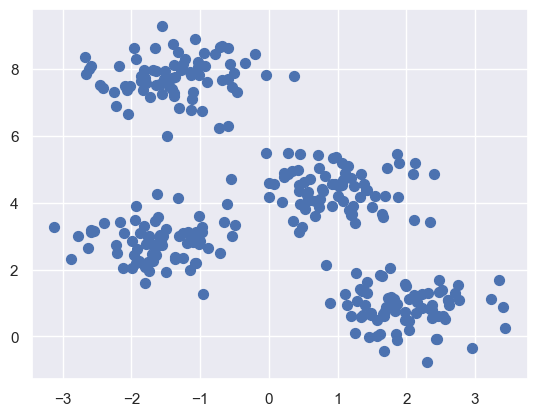

In [26]:
from sklearn.datasets import make_blobs # menghasilkan data sampel yang terdiri dari beberapa kelompok (blobs) yang terpisah secara visual

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0) # digunakan untuk menghasilkan data yang berisi beberapa kelompok (blobs) dengan sebaran tertentu
plt.scatter(X[:, 0], X[:, 1], s=50) # memvisualisasikan distribusi data pada data berdimensi dua

In [27]:
from sklearn.cluster import KMeans # Library yang digunakan dalam clustering

kmeans = KMeans(n_clusters=4, n_init=10) # membagi data menjadi empat cluster berdasarkan pola yang ada dalam data
kmeans.fit(X) # melatih model K-Means dengan data X
y_kmeans = kmeans.predict(X) # melakukan prediksi dengan kmeans untuk kolom y_kmeans dengan data X

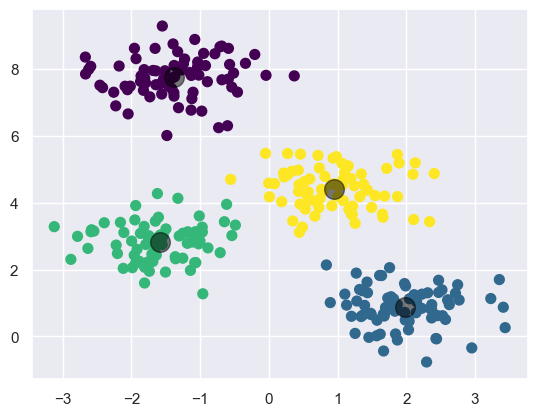

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') # memvisualisasikan scatter plot

centers = kmeans.cluster_centers_ # menyimpan pusat (centroid) dari masing-masing cluster setelah pemodelan K-Means dilakukan
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # menampilkan pusat dari setiap cluster (centroid) sebagai titik-titik dalam warna hitam

**Algoritma Expectation-Maximization**

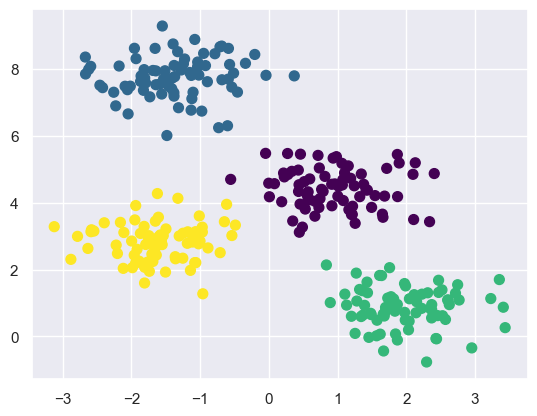

In [29]:
from sklearn.metrics import pairwise_distances_argmin # function yang digunakan untuk menghitung indeks data terdekat dari sekelompok pusat kluster

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4) # menjalankan function find_clusters() untuk memperoleh centers dan lebels
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis') # memvisualisasikan scatter plot

**Perubahan random**

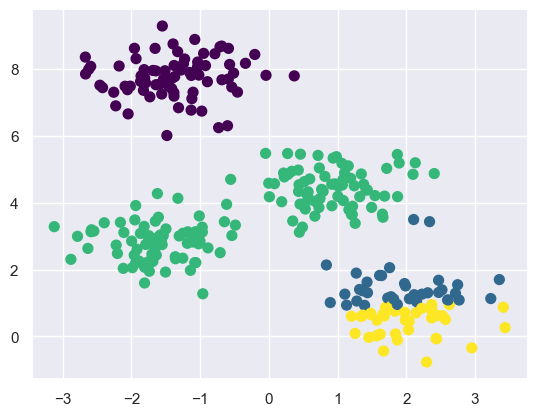

In [30]:
centers, labels = find_clusters(X, 4, rseed=0) # menjalankan function find_clusters() untuk memperoleh centers dan lebels
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis') # memvisualisasikan scatter plot

**Optimalisasi Jumlah Klaster**

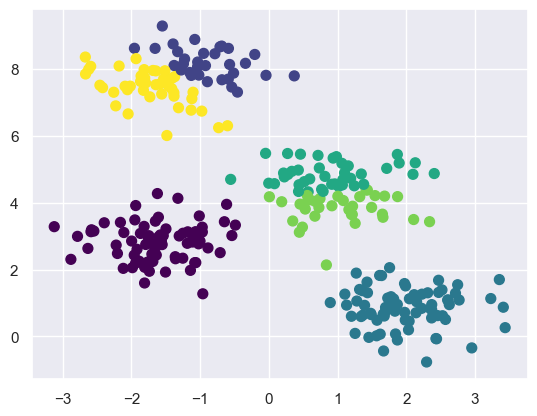

In [31]:
labels = KMeans(6, random_state=0, n_init=10).fit_predict(X) # Menempatkan setiap data ke salah satu dari 6 kluster berdasarkan posisi pusat kluster yang dihasilkan oleh algoritma K-Means
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis') # memvisualisasikan scatter plot

**Batas Klaster yang Tidak Selalu Linier**

In [32]:
from sklearn.datasets import make_moons # digunakan untuk menghasilkan dataset sintetis dengan dua kelas yang terpisah seperti dua bulan sabit

X, y = make_moons(200, noise=.05, random_state=0) # membuat dataset sintetis

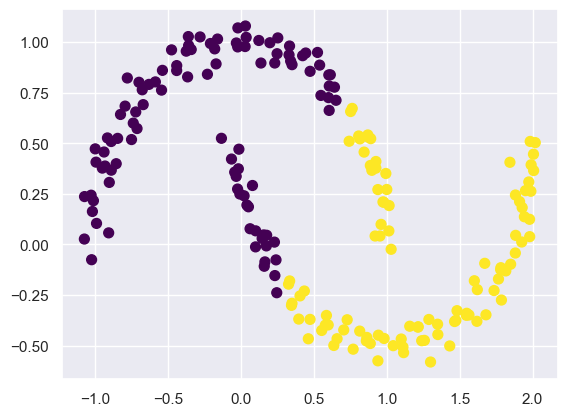

In [33]:
labels = KMeans(2, random_state=0, n_init=10).fit_predict(X) # Menempatkan setiap data ke salah satu dari 2 kluster berdasarkan posisi pusat kluster yang dihasilkan oleh algoritma K-Means
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis') # memvisualisasikan scatter plot

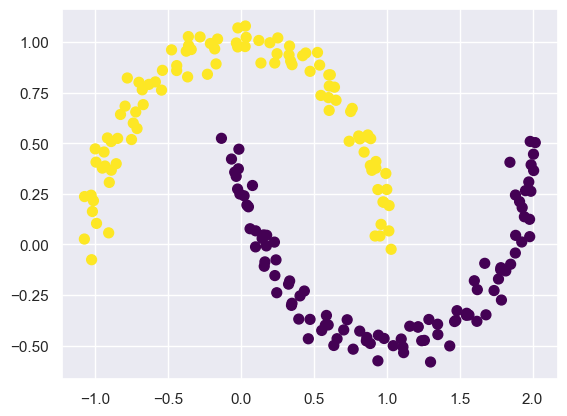

In [34]:
from sklearn.cluster import SpectralClustering # metode pengelompokan yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok (kluster)

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans') # membuat sebuah objek SpectralClustering
labels = model.fit_predict(X) # melakukan prediksi untuk labels berdasarkan data X
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis') # memvisualisasikan scatter plot

**Contoh Kasus 1: Karakter Angka**

In [35]:
from sklearn.datasets import load_digits # Dataset ini berisi citra digit tulisan tangan (0-9) yang digunakan untuk tugas pengenalan angka. Setiap citra berukuran 8x8 piksel.

digits = load_digits() # memuat dataset
digits.data.shape # menampilkan ukuran baris dan kolom dataset

(1797, 64)

In [36]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10) # membuat sebuah objek KMeans dengan 10 cluster
clusters = kmeans.fit_predict(digits.data) # melakukan prediksi clusters
kmeans.cluster_centers_.shape # digunakan untuk mengetahui dimensi dari pusat kluster yang dihasilkan

(10, 64)

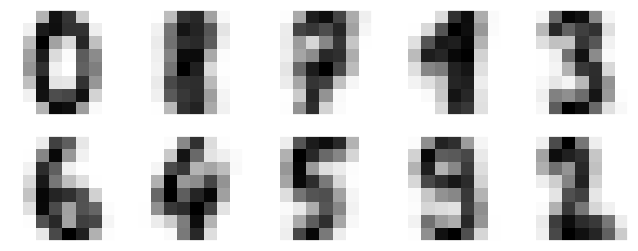

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) # membuat sebuah gambar dengan 2 baris dan 5 kolom\ untuk menampilkan beberapa visualisasi data
centers = kmeans.cluster_centers_.reshape(10, 8, 8) # mengambil pusat dari kluster

# menampilkan citra angka
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [38]:
from scipy.stats import mode # digunakan untuk menghitung modus dari suatu dataset

labels = np.zeros_like(clusters) # membuat array labels dengan nilai 0

# mengisi nilai pada setiap indeks labels
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [39]:
from sklearn.metrics import accuracy_score # digunakan untuk menghitung skor akurasi

accuracy_score(digits.target, labels) # menghitung skor akurasi dan menampilkannya

0.7918753478018921

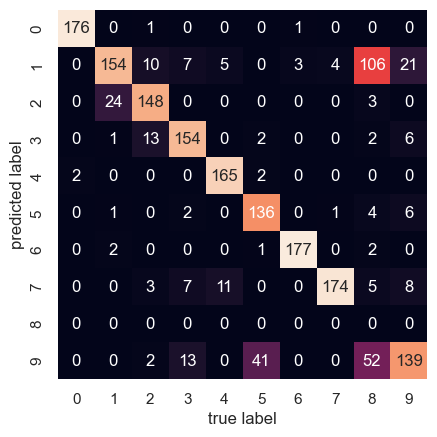

In [40]:
from sklearn.metrics import confusion_matrix # function yang digunakan untuk menghitung confusion matrix sebagai alat evaluasi kinerja model klasifikasi

mat = confusion_matrix(digits.target, labels) # menghitung confusion matrix berdasarkan dua array

# Menampilkan heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [41]:
from sklearn.manifold import TSNE # t-Distributed Stochastic Neighbor Embedding, yang merupakan teknik pengurangan dimensi

tsne = TSNE(n_components=2, init='random', random_state=0) # membuat objek TNSE
digits_proj = tsne.fit_transform(digits.data) # melatih objek TNSE dengan data dari digits.data

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10) # membuat sebuah objek KMeans dengan 10 cluster
clusters = kmeans.fit_predict(digits_proj) # memprediksi nilai untuk clusters dengan kmeans dan data digits_proj

# permutasi label
labels = np.zeros_like(clusters) # membuat array labels dengan nilai awal 0

# memperbarui nilai setiap indeks labels
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

**Studi Kasus 2: Kompresi Citra**

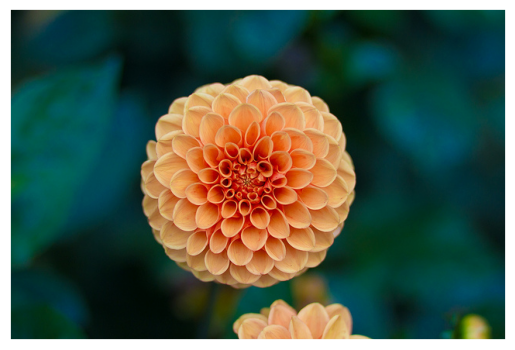

In [42]:
from sklearn.datasets import load_sample_image # function ini digunakan untuk memuat sampel gambar dari koleksi gambar

flower = load_sample_image("flower.jpg") # memuat data flower.jpg
ax = plt.axes(xticks=[], yticks=[]) # menghapus tanda sumbu dari grafik
ax.imshow(flower) # menampilkan gambar flower

In [43]:
flower.shape # menampilkan ukuran flower

(427, 640, 3)

In [44]:
data = flower / 255.0 # membagi data flower dengan 255
data = data.reshape(427 * 640, 3) # mengubah data menjadi array 2 dimensi
data.shape # menampilkan ukuran data

(273280, 3)

In [45]:
# menampilkan sebaran pixel warna
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

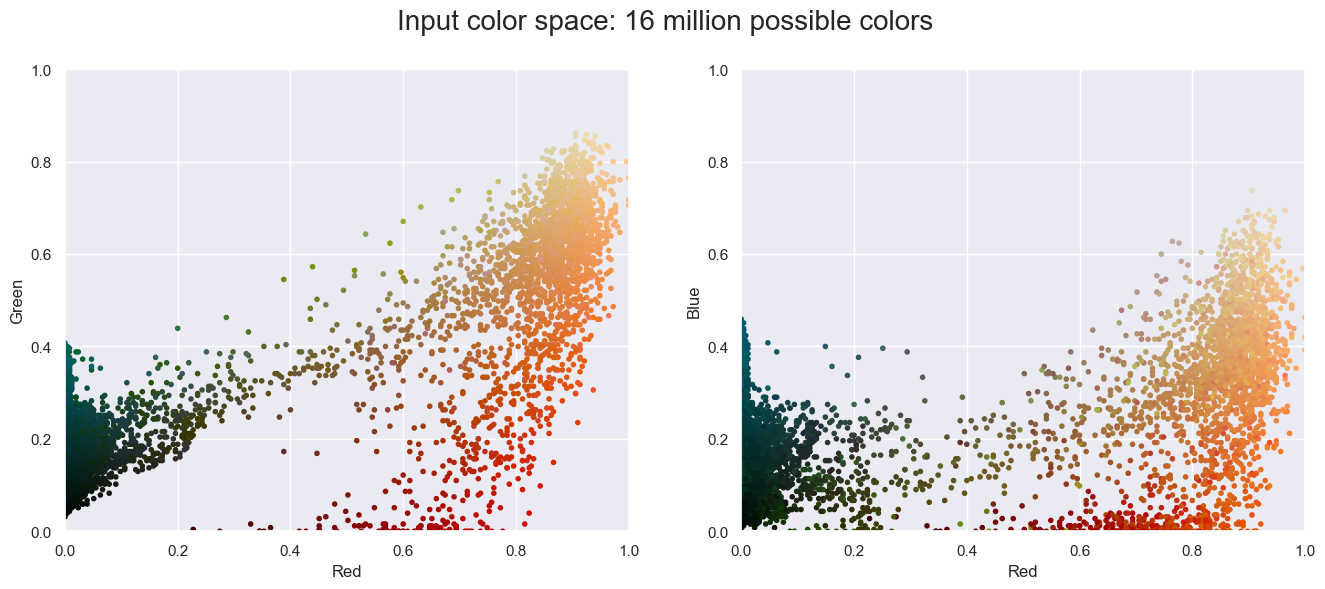

In [46]:
plot_pixels(data, title='Input color space: 16 million possible colors') # memanggil function plot_pixels()

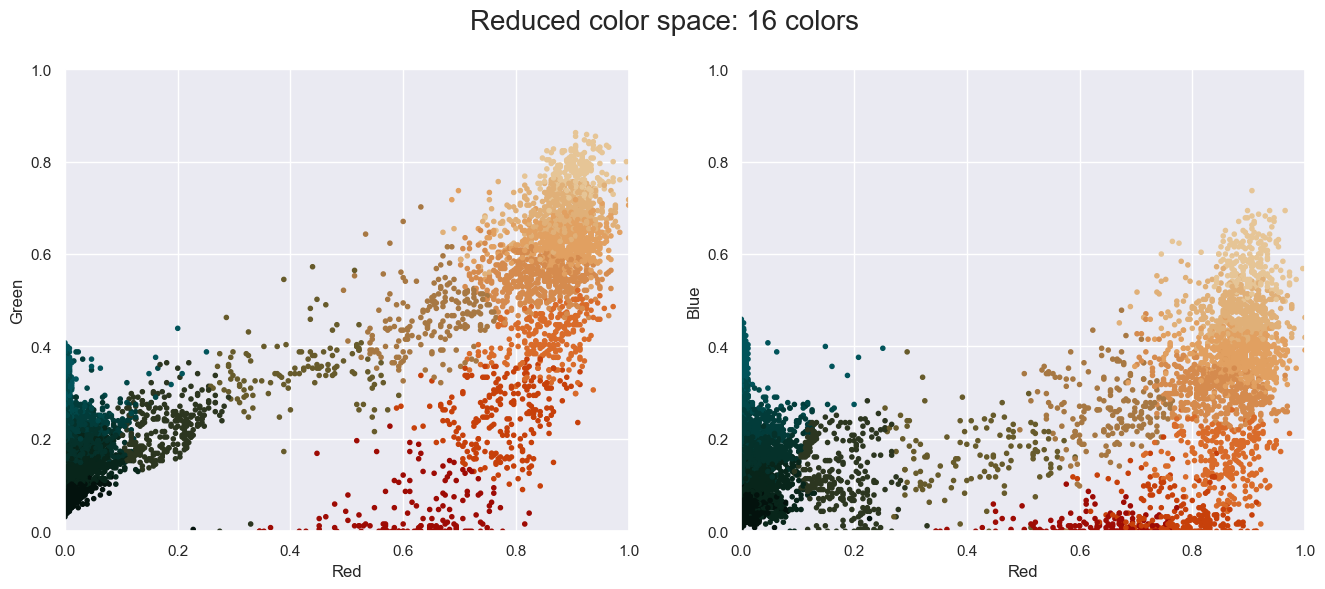

In [47]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans # variasi dari algoritma K-Means yang memproses sekelompok data kecil (batch) pada satu waktu daripada seluruh dataset saat proses pelatihan

kmeans = MiniBatchKMeans(16) # membuat sebuah objek MiniBatchKMeans dengan 16 cluster
kmeans.fit(data) # melatih model dengan data
new_colors = kmeans.cluster_centers_[kmeans.predict(data)] # mengambil pusat cluster dari model MiniBatchKMeans yang telah di-latih dan menghubungkan setiap vektor data gambar dengan cluster yang sesuai melalui pemanggilan .predict(data) pada model KMeans.

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors") # memanggil function plot_pixels()

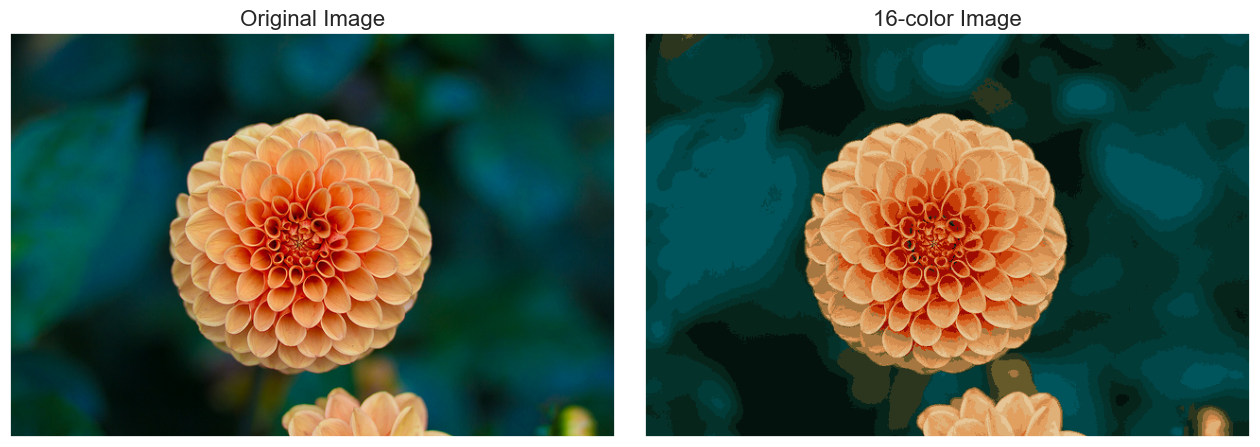

In [48]:
flower_recolored = new_colors.reshape(flower.shape) # mengambil daftar new_colors yang telah dibentuk sebelumnya dan menggunakan metode .reshape() untuk mengubahnya menjadi bentuk yang sesuai dengan bentuk asli gambar flower

# mengelola dan menampilkan hasil gambar
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)